In [ ]:
!pip install -q pandas numpy scikit-learn matplotlib seaborn


In [7]:
import pandas as pd

# dataset paths
fake_path = "/content/fakeAccountData.json"
real_path = "/content/realAccountData.json"

# Loading the JSON arrays
fake_df = pd.read_json(fake_path)
real_df = pd.read_json(real_path)

print("Fake shape:", fake_df.shape)
print("Real shape:", real_df.shape)

fake_df.head(), real_df.head()

Fake shape: (200, 9)
Real shape: (994, 9)


(   userFollowerCount  userFollowingCount  userBiographyLength  userMediaCount  \
 0                 25                1937                    0               0   
 1                324                4122                    0               0   
 2                 15                 399                    0               0   
 3                 14                 107                    0               1   
 4                264                4651                    0               0   
 
    userHasProfilPic  userIsPrivate  usernameDigitCount  usernameLength  isFake  
 0                 1              1                   0              10       1  
 1                 1              0                   4              15       1  
 2                 0              0                   3              12       1  
 3                 1              0                   1              10       1  
 4                 1              0                   0              14       1  ,
    userFollo

In [8]:
# Merging it into one dataset
data = pd.concat([fake_df, real_df], ignore_index=True)

print("Combined shape:", data.shape)

# Shuffling it to mix fake and real rows randomly
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

data.head()


Combined shape: (1194, 9)


,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,473,794,0,4,1,1,0,8,0
1,239,324,106,29,1,1,0,10,0
2,209,240,0,0,1,0,0,6,0
3,594,863,105,276,1,1,0,9,0
4,14,3359,0,0,1,0,1,7,1


In [9]:
data['isFake'].value_counts()


,count
isFake,
0,994
1,200


In [10]:
data.isna().sum()


,0
userFollowerCount,0
userFollowingCount,0
userBiographyLength,0
userMediaCount,0
userHasProfilPic,0
userIsPrivate,0
usernameDigitCount,0
usernameLength,0
isFake,0


In [11]:
data.dtypes


,0
userFollowerCount,int64
userFollowingCount,int64
userBiographyLength,int64
userMediaCount,int64
userHasProfilPic,int64
userIsPrivate,int64
usernameDigitCount,int64
usernameLength,int64
isFake,int64


In [12]:
data.describe()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,369.095477,744.261307,22.847571,57.596315,0.922948,0.657454,0.495812,11.123953,0.167504
std,372.775741,1032.526420,33.492868,107.402157,0.266786,0.474760,1.212010,2.998135,0.373582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,152.000000,267.000000,0.000000,3.000000,1.000000,0.000000,0.000000,9.000000,0.000000
50%,304.000000,449.000000,7.000000,20.000000,1.000000,1.000000,0.000000,11.000000,0.000000
75%,481.000000,711.000000,33.000000,67.000000,1.000000,1.000000,0.000000,13.000000,0.000000
max,4492.000000,7497.000000,150.000000,1058.000000,1.000000,1.000000,10.000000,30.000000,1.000000


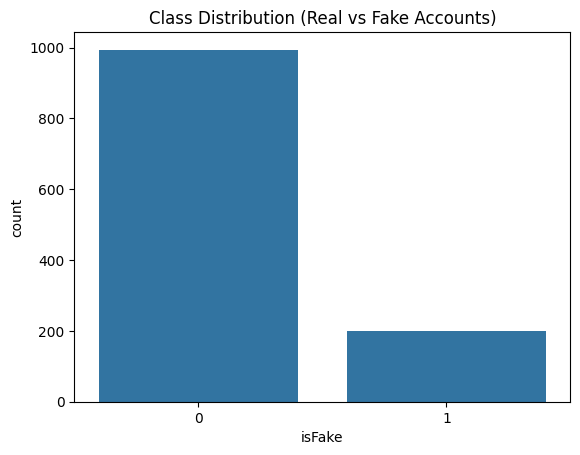

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='isFake')
plt.title("Class Distribution (Real vs Fake Accounts)")
plt.show()


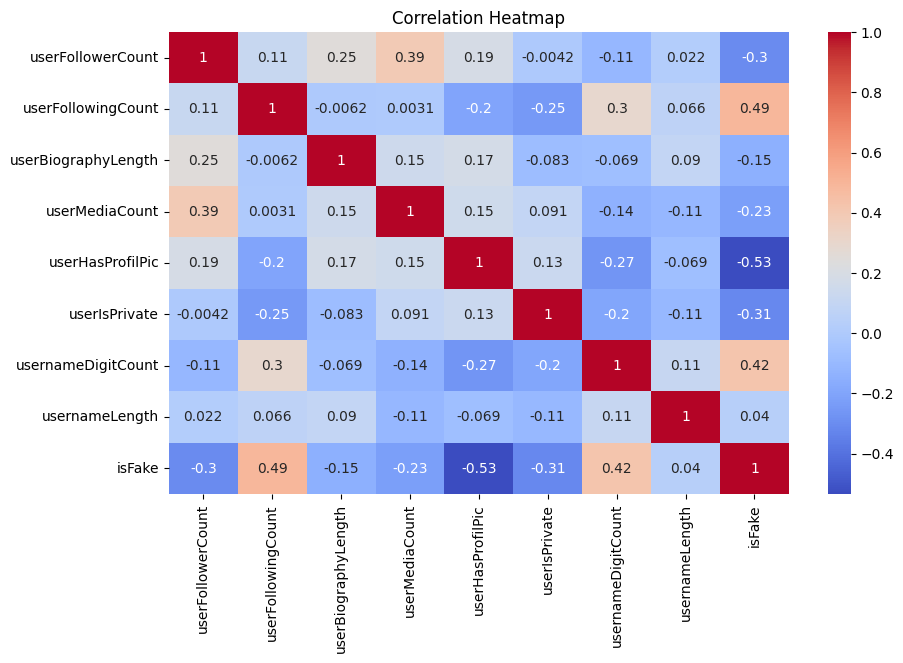

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [16]:
# Defining the X and y
X = data.drop("isFake", axis=1)
y = data["isFake"]

print("X shape:", X.shape)
print("y shape:", y.shape)

# Stratified Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Fake in train:", sum(y_train))
print("Fake in test:", sum(y_test))

# Scaling the numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled shapes:", X_train_scaled.shape, X_test_scaled.shape)


X shape: (1194, 8)
y shape: (1194,)
Train shape: (955, 8) (955,)
Test shape: (239, 8) (239,)
Fake in train: 160
Fake in test: 40
Scaled shapes: (955, 8) (239, 8)


In [17]:
#Handling the class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", sum(y_train), "fake out of", len(y_train))
print("After SMOTE:", sum(y_train_resampled), "fake out of", len(y_train_resampled))


Before SMOTE: 160 fake out of 955
After SMOTE: 795 fake out of 1590


## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Training the Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=200)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

print(" Logistic Regression")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


 Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       199
           1       0.73      0.88      0.80        40

    accuracy                           0.92       239
   macro avg       0.85      0.90      0.87       239
weighted avg       0.93      0.92      0.93       239

Confusion Matrix:
[[186  13]
 [  5  35]]


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

rf.fit(X_train_resampled, y_train_resampled)

# Prediction on the real test set (scaled)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       199
           1       0.85      0.88      0.86        40

    accuracy                           0.95       239
   macro avg       0.91      0.92      0.92       239
weighted avg       0.95      0.95      0.95       239

Confusion Matrix:
[[193   6]
 [  5  35]]


## XGBoost

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb.predict(X_test_scaled)

print("XGBoost")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       199
           1       0.83      0.88      0.85        40

    accuracy                           0.95       239
   macro avg       0.90      0.92      0.91       239
weighted avg       0.95      0.95      0.95       239

Confusion Matrix:
[[192   7]
 [  5  35]]


## ROC Curve for all 3 models


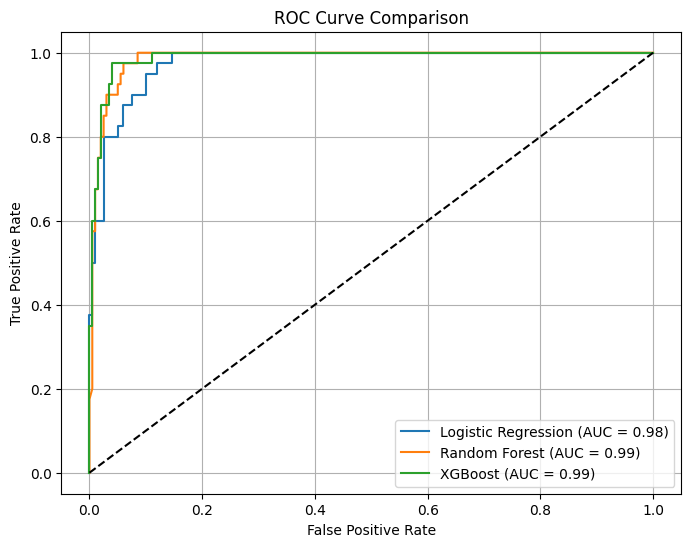

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probability scores
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:,1]
y_prob_rf = rf.predict_proba(X_test_scaled)[:,1]
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:,1]

# ROC values
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")

plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

## Precision–Recall Curve

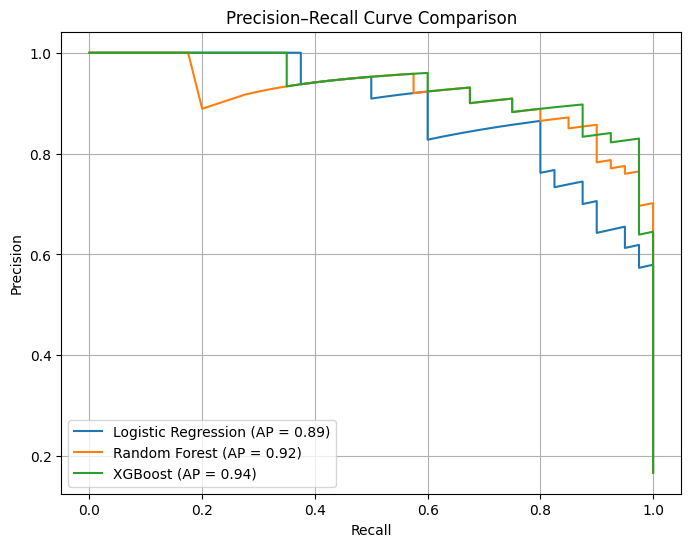

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_prob_lr)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)

ap_lr = average_precision_score(y_test, y_prob_lr)
ap_rf = average_precision_score(y_test, y_prob_rf)
ap_xgb = average_precision_score(y_test, y_prob_xgb)

plt.figure(figsize=(8,6))
plt.plot(rec_lr, prec_lr, label=f"Logistic Regression (AP = {ap_lr:.2f})")
plt.plot(rec_rf, prec_rf, label=f"Random Forest (AP = {ap_rf:.2f})")
plt.plot(rec_xgb, prec_xgb, label=f"XGBoost (AP = {ap_xgb:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
!pip install tensorflow


## Basic MLP Classifier

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [25]:
# Converting y to numpy arrays
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

# BUILDING MODEL
mlp = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# TRAINING MODEL
history_mlp = mlp.fit(
    X_train_scaled,
    y_train_arr,
    validation_data=(X_test_scaled, y_test_arr),
    epochs=25,
    batch_size=16,
    verbose=1
)


Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8378 - loss: 0.5925 - val_accuracy: 0.8870 - val_loss: 0.4222
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9109 - loss: 0.3564 - val_accuracy: 0.9121 - val_loss: 0.2753
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9305 - loss: 0.2173 - val_accuracy: 0.9121 - val_loss: 0.2211
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9398 - loss: 0.1623 - val_accuracy: 0.9163 - val_loss: 0.2057
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9426 - loss: 0.1559 - val_accuracy: 0.9163 - val_loss: 0.1958
Epoch 6/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9523 - loss: 0.1307 - val_accuracy: 0.9163 - val_loss: 0.1879
Epoch 7/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9521 - loss: 0.1239 - val_accuracy: 0.9205 - val_loss: 0.1791
Epoch 8/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9452 - loss: 0.1289 - val_accuracy: 0.9205 - val_loss

In [27]:
# Evaluating the model
y_pred_mlp = (mlp.predict(X_test_scaled) > 0.5).astype("int32")

print(" MLP MODEL RESULTS")
print(classification_report(y_test_arr, y_pred_mlp))
print("Confusion Matrix:")
print(confusion_matrix(y_test_arr, y_pred_mlp))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
 MLP MODEL RESULTS
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       199
           1       0.79      0.78      0.78        40

    accuracy                           0.93       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.93      0.93      0.93       239

Confusion Matrix:
[[191   8]
 [  9  31]]


## Deep Network (Dense + BatchNorm + Dropout)

In [28]:
deep_model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

deep_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_deep = deep_model.fit(
    X_train_scaled,
    y_train_arr,
    validation_data=(X_test_scaled, y_test_arr),
    epochs=30,
    batch_size=16,
    verbose=1
)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.6179 - loss: 0.6736 - val_accuracy: 0.9079 - val_loss: 0.4693
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8729 - loss: 0.3585 - val_accuracy: 0.9205 - val_loss: 0.3156
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9018 - loss: 0.2660 - val_accuracy: 0.9121 - val_loss: 0.2531
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9128 - loss: 0.2443 - val_accuracy: 0.9121 - val_loss: 0.2225
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9277 - loss: 0.1961 - val_accuracy: 0.9121 - val_loss: 0.2068
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9219 - loss: 0.1853 - val_accuracy: 0.9121 - val_loss: 0.2030
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9304 - loss: 0.1865 - val_accuracy: 0.9121 - val_loss: 0.2080
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9127 - loss: 0.1932 - val_accuracy: 0.9205 - val_loss: 0.1975
E

In [29]:
y_pred_deep = (deep_model.predict(X_test_scaled) > 0.5).astype("int32")

print("DEEP MODEL RESULTS")
print(classification_report(y_test_arr, y_pred_deep))
print("Confusion Matrix:")
print(confusion_matrix(y_test_arr, y_pred_deep))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
DEEP MODEL RESULTS
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       199
           1       0.82      0.78      0.79        40

    accuracy                           0.93       239
   macro avg       0.89      0.87      0.88       239
weighted avg       0.93      0.93      0.93       239

Confusion Matrix:
[[192   7]
 [  9  31]]


## Training Curves for MLP and Deep Model

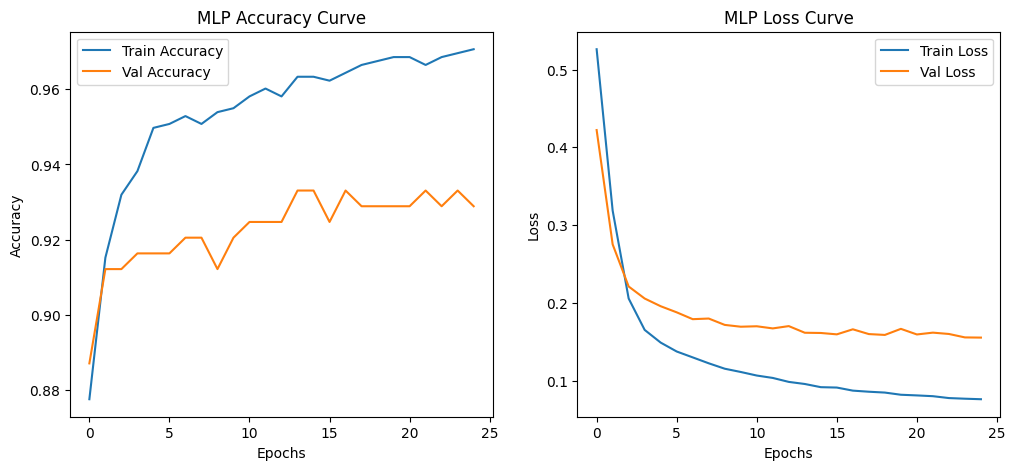

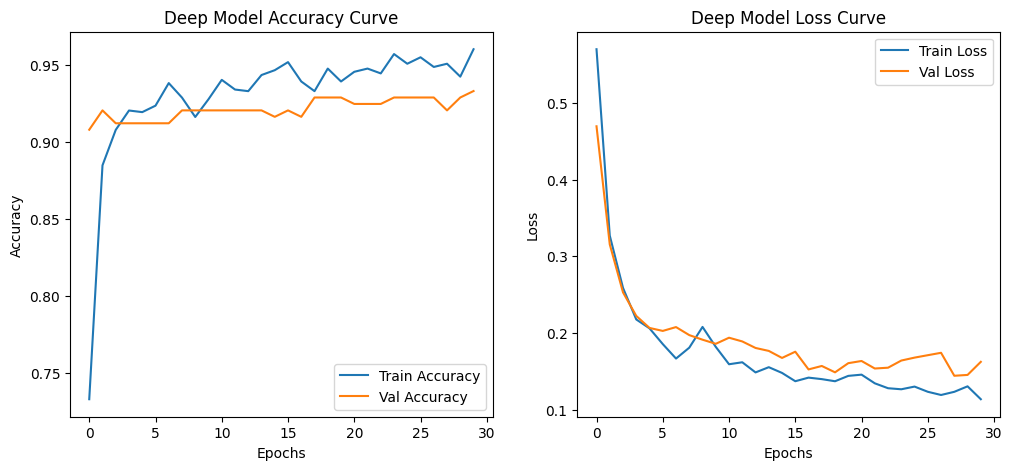

In [30]:
import matplotlib.pyplot as plt

# MLP Training Curves
plt.figure(figsize=(12,5))

# Accuracy curve
plt.subplot(1,2,1)
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Val Accuracy')
plt.title("MLP Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss curve
plt.subplot(1,2,2)
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Val Loss')
plt.title("MLP Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# DEEP MODEL Training Curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_deep.history['accuracy'], label='Train Accuracy')
plt.plot(history_deep.history['val_accuracy'], label='Val Accuracy')
plt.title("Deep Model Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_deep.history['loss'], label='Train Loss')
plt.plot(history_deep.history['val_loss'], label='Val Loss')
plt.title("Deep Model Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


## ROC Curve (MLP vs Deep Model)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


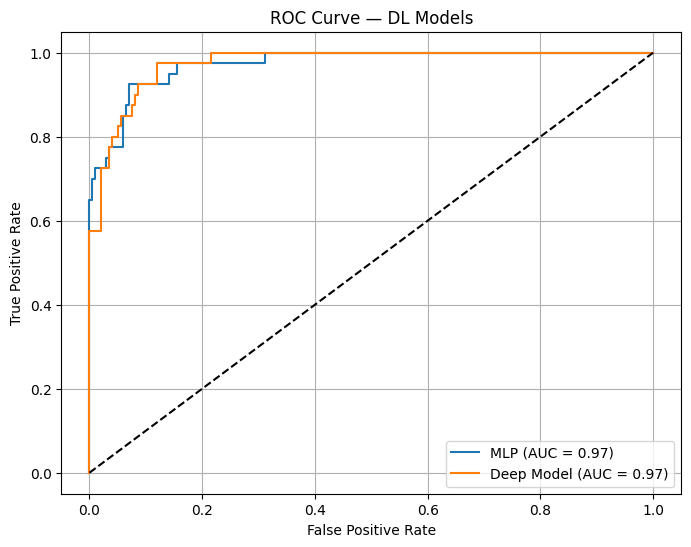

In [31]:
from sklearn.metrics import roc_curve, auc

# Probabilities
y_prob_mlp = mlp.predict(X_test_scaled).ravel()
y_prob_deep = deep_model.predict(X_test_scaled).ravel()

# ROC values
fpr_mlp, tpr_mlp, _ = roc_curve(y_test_arr, y_prob_mlp)
fpr_deep, tpr_deep, _ = roc_curve(y_test_arr, y_prob_deep)

auc_mlp = auc(fpr_mlp, tpr_mlp)
auc_deep = auc(fpr_deep, tpr_deep)

plt.figure(figsize=(8,6))
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP (AUC = {auc_mlp:.2f})")
plt.plot(fpr_deep, tpr_deep, label=f"Deep Model (AUC = {auc_deep:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — DL Models")
plt.legend()
plt.grid(True)
plt.show()


## Precision–Recall Curve (MLP vs Deep Model)

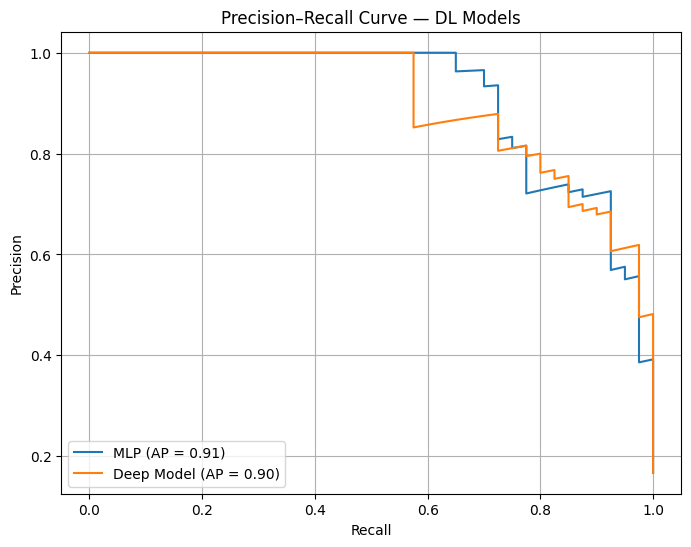

In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score

prec_mlp, rec_mlp, _ = precision_recall_curve(y_test_arr, y_prob_mlp)
prec_deep, rec_deep, _ = precision_recall_curve(y_test_arr, y_prob_deep)

ap_mlp = average_precision_score(y_test_arr, y_prob_mlp)
ap_deep = average_precision_score(y_test_arr, y_prob_deep)

plt.figure(figsize=(8,6))
plt.plot(rec_mlp, prec_mlp, label=f"MLP (AP = {ap_mlp:.2f})")
plt.plot(rec_deep, prec_deep, label=f"Deep Model (AP = {ap_deep:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — DL Models")
plt.legend()
plt.grid(True)
plt.show()


## XAI - SHAP and LIME

In [33]:
!pip install shap lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=177f3038b3b02d9b7a3ba64a90aeb067271159bc7d83b50a314c55f9c7f40a41
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


## SHAP for Random Forest (Global Importance + Summary Plot)

In [38]:
# Wrapper
def rf_proba_fake(X):
    return rf.predict_proba(X)[:,1]


  0%|          | 0/100 [00:00<?, ?it/s]

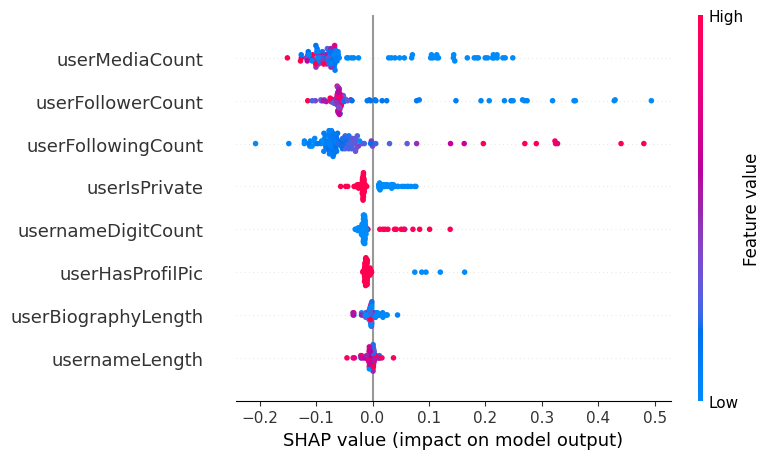

In [39]:
import shap
import numpy as np

shap.initjs()

# Using the scaled training as background
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

# KernelExplainer with the custom wrapper
explainer = shap.KernelExplainer(rf_proba_fake, background)

# Computing the SHAP values for first 100 test samples
shap_values = explainer.shap_values(X_test_scaled[:100])

# Converting it to DataFrame
X_test_df = pd.DataFrame(X_test_scaled[:100], columns=X.columns)

# Summary plot
shap.summary_plot(shap_values, X_test_df, feature_names=X.columns)


## LIME Explanation for a Single Prediction

In [40]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Creating the LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Real', 'Fake'],
    mode='classification'
)

# Explaining a specific instance
i = 0
exp = lime_explainer.explain_instance(
    X_test_scaled[i],
    rf.predict_proba,
    num_features=8
)

# Showing the explanation
exp.show_in_notebook(show_table=True)
exp.as_list()


[('userFollowingCount <= -0.47', -0.13263402057131018),
 ('-0.35 < userMediaCount <= 0.09', -0.12165540983399745),
 ('-0.57 < userFollowerCount <= -0.17', -0.07085376120967792),
 ('userIsPrivate <= -1.41', 0.04757759740186355),
 ('userBiographyLength <= -0.67', 0.010117878868864366),
 ('-0.02 < usernameLength <= 0.65', -0.008065158825634487),
 ('usernameDigitCount <= -0.42', -0.006961717421498509),
 ('userHasProfilPic <= 0.29', 0.0)]